In [2]:
import pandas as pd

In [3]:
df=pd.read_csv(r"Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.drop('CustomerID',axis=1,inplace=True)

In [8]:
df.shape

(200, 4)

In [9]:
df.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

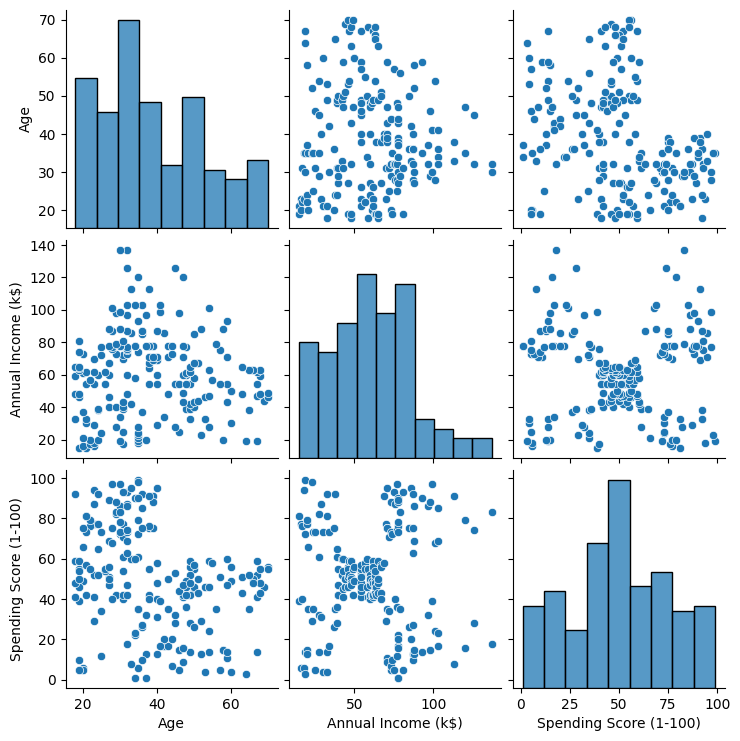

In [11]:
sns.pairplot(df)

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

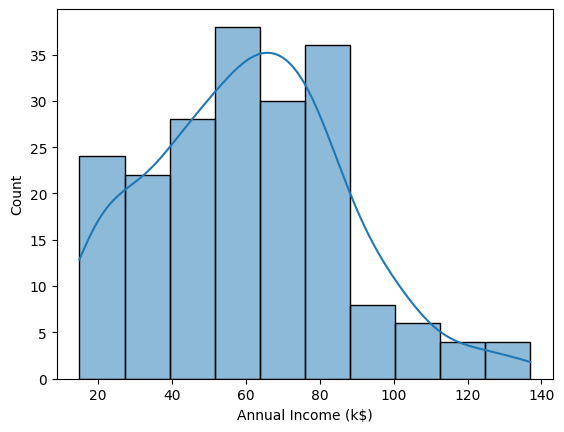

In [12]:
sns.histplot(x=df['Annual Income (k$)'],kde=True)

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

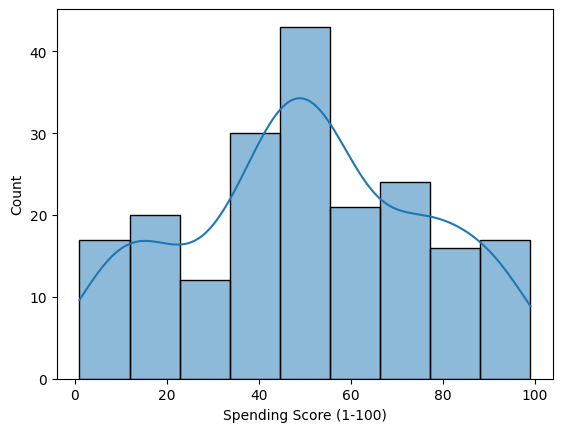

In [13]:
sns.histplot(x=df['Spending Score (1-100)'],kde=True)

<Axes: xlabel='Annual Income (k$)'>

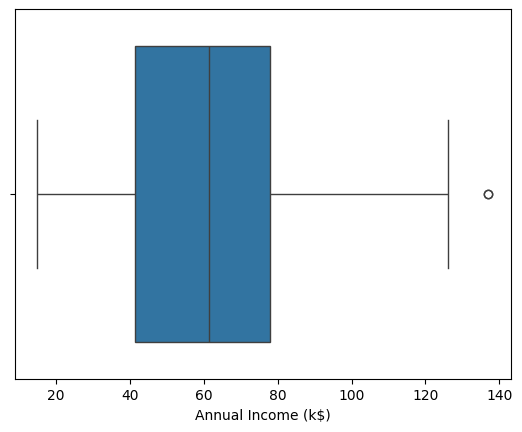

In [14]:
sns.boxplot(x=df['Annual Income (k$)'])

<Axes: xlabel='Spending Score (1-100)'>

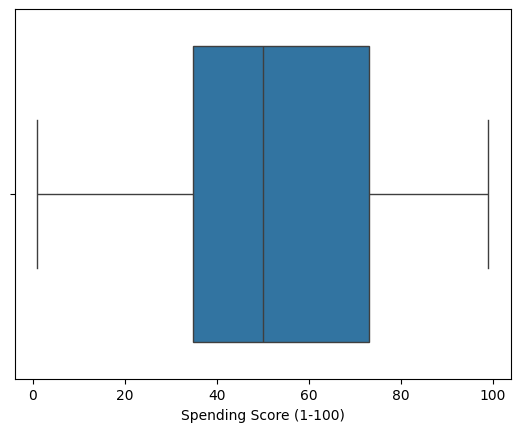

In [15]:
sns.boxplot(x=df['Spending Score (1-100)'])

<Axes: xlabel='Age', ylabel='Count'>

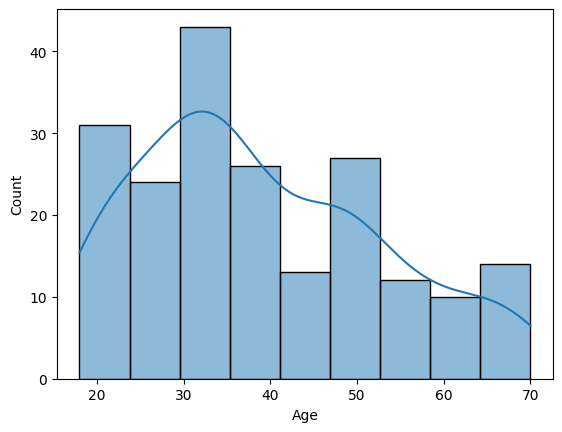

In [16]:
sns.histplot(x=df['Age'],kde=True)

<Axes: xlabel='Genre', ylabel='count'>

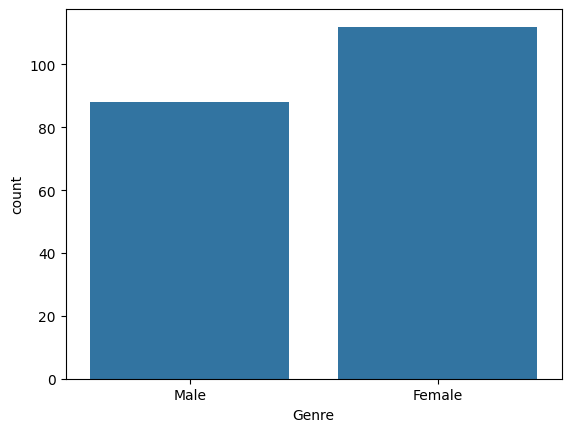

In [17]:
sns.countplot(x=df['Genre'])

In [18]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [24]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [33]:
from sklearn.cluster import KMeans
model=KMeans( n_clusters=3)
model.fit(x)
df['clusters']=model.labels_

In [26]:
print(f"lables:\n{model.labels_}\n,centers\n{model.cluster_centers_}\n,inertia\n{model.inertia_}\n")

lables:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
,centers
[[86.53846154 82.12820513]
 [87.         18.63157895]
 [44.15447154 49.82926829]]
,inertia
106348.37306211119



In [52]:
wcss=[]
for i in range(1,16):
    model=KMeans(n_clusters=i)
    model.fit(x)
    print(f"for {i} clusters inertia is {model.inertia_}")
    print(f"lables:\n{model.labels_}\n,centers\n{model.cluster_centers_}\n,inertia\n{model.inertia_}\n")
    wcss.append(model.inertia_)

for 1 clusters inertia is 269981.28
lables:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
,centers
[[60.56 50.2 ]]
,inertia
269981.28

for 2 clusters inertia is 184609.9843409062
lables:
[1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
,centers
[[70.64150943 17.30188679]
 [56.9251

Text(0, 0.5, 'WCSS')

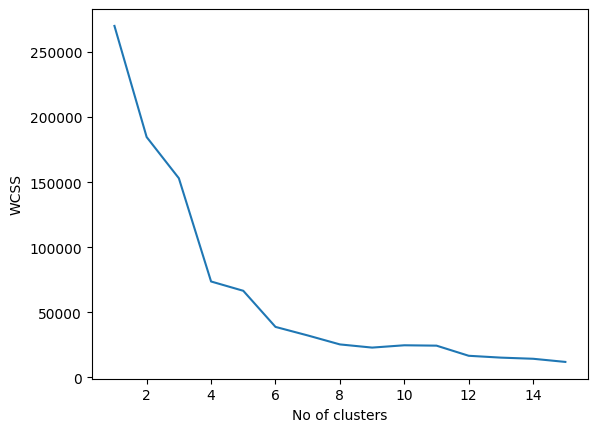

In [53]:
sns.lineplot(x=range(1,16),y=wcss)
plt.xlabel("No of clusters")
plt.ylabel("WCSS")  

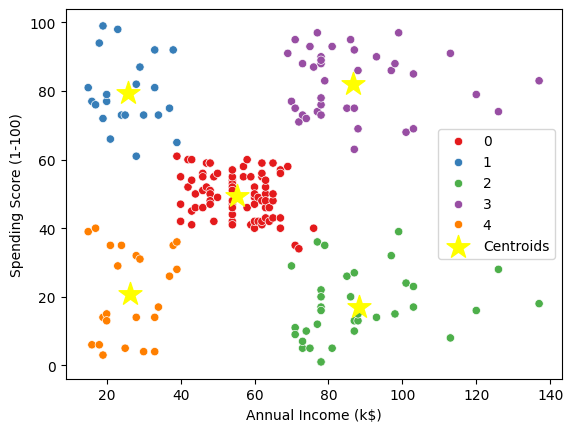

In [55]:
#scatter plot for 5 clusters
model=KMeans(n_clusters=5)
model.fit(x)
df['clusters']=model.labels_
df.head()
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=df['clusters'],palette='Set1')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=300,c='yellow',label='Centroids',marker='*')
plt.legend()

In [ ]:
import numpy as np
income=int(input("Enter your annual income : "))
score=int(input("Enter the spending score (1-100) : "))
new_data=[[income,score]]
prediction=model.predict(new_data)
print(prediction[0])

2


C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


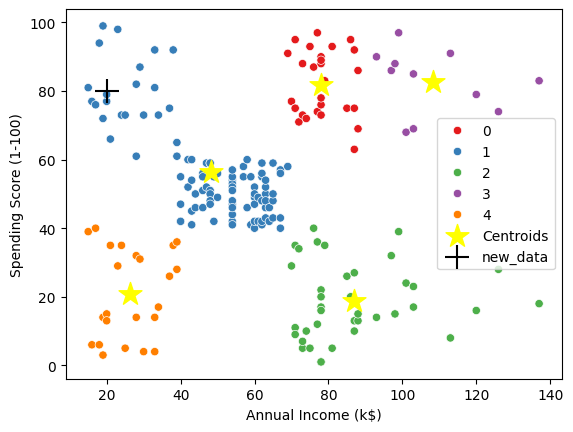

In [51]:
#scatter plot for 5 clusters
model=KMeans(n_clusters=5)
model.fit(x)
df['clusters']=model.labels_
df.head()
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=df['clusters'],palette='Set1')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=300,c='yellow',label='Centroids',marker='*')
plt.scatter(income,score,s=300,c='black',label='new_data',marker='+')
plt.legend()

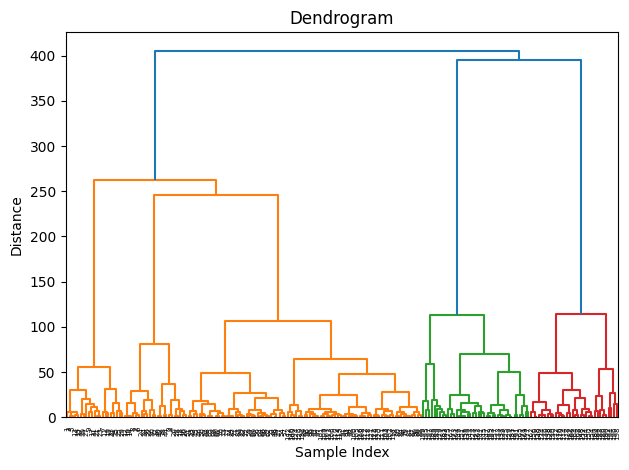

In [60]:
from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt
merg=linkage(x,method='ward')
dendrogram(merg)
plt.title("Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()